好的，我们来解决一个非常经典、也非常有实际应用价值的时间序列预测问题：预测国际航空公司的月度客流量。

一、 经典问题：国际航空客流量预测

问题描述：
我们有一个著名的数据集，记录了从1949年到1960年，每月国际航空公司的乘客数量。我们的任务是根据这些历史数据，建立一个模型来预测未来一段时间的乘客数量。

为什么这个问题很经典且适合ARIMA？

明显的趋势 (Trend)：随着时间的推移，航空业在发展，乘客数量总体上是持续增长的。这是一个典型的非平稳特征。

明显的季节性 (Seasonality)：每年都有一个固定的模式。乘客数量在夏季（旅游旺季）会达到高峰，而在秋冬季会回落。这是一个以12个月为周期的季节性特征。

数据的自相关性：这个月的乘客数量，很明显与上个月、去年同期的乘客数量高度相关。

这三个特征——趋势、季节性、自相关性——完美地契合了 SARIMA (Seasonal ARIMA) 模型的应用场景。基础的ARIMA可以处理趋势，但无法很好地处理季节性，所以我们需要它的“究极进化版”SARIMA。

二、 Python 代码：用SARIMA解决航空客流量预测

我们将遵循一个完整的时间序列分析流程：
数据加载与可视化，观察趋势和季节性。
数据分解，更清晰地分离出趋势、季节和残差。
确定差分阶数 d 和 D，使数据平稳。
使用 auto_arima 自动寻找最优的 (p,q) 和 (P,Q) 参数。
建立SARIMA模型并进行预测。
可视化预测结果并评估模型。

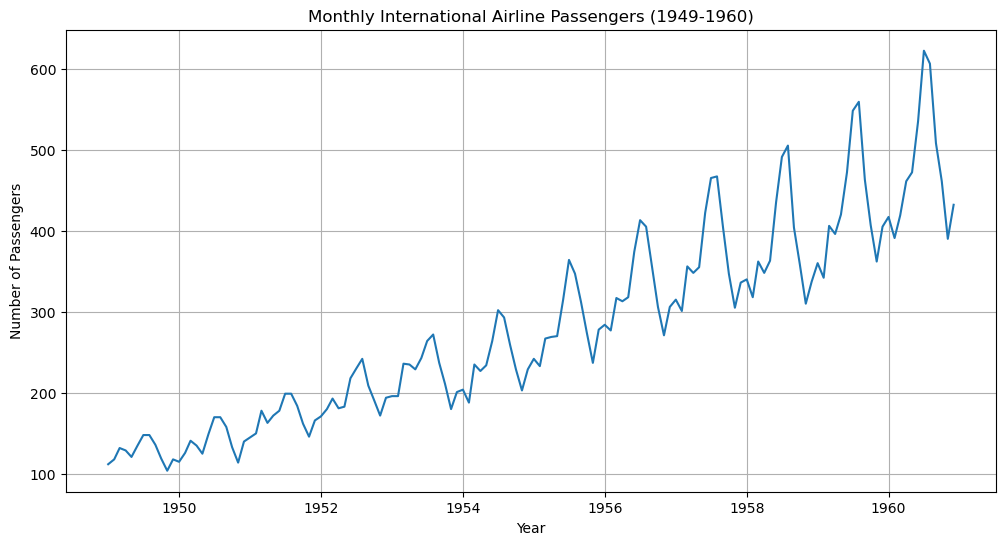

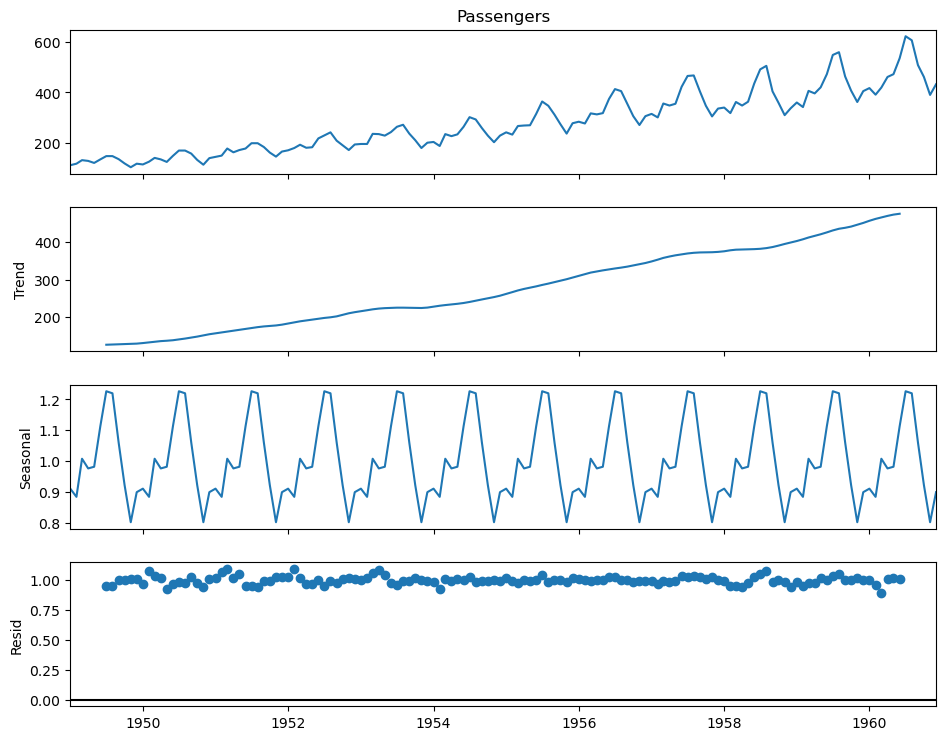

--- 原始数据的平稳性检验 ---
ADF Statistic: 0.8153688792060511
p-value: 0.991880243437641
数据是非平稳的

--- 经过趋势和季节性差分后的数据平稳性检验 ---
ADF Statistic: -15.595618083746338
p-value: 1.856511600123444e-28
数据是平稳的


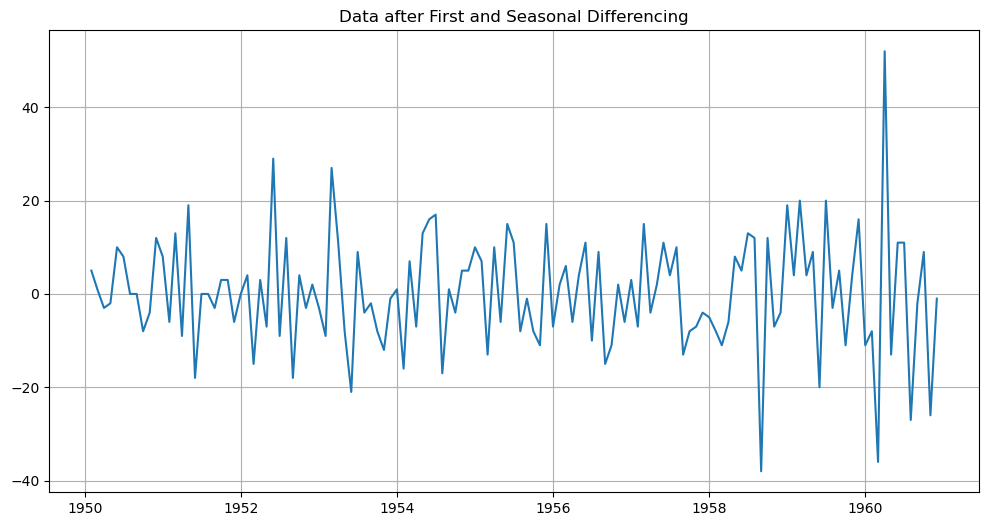


--- 使用 auto_arima 寻找最优SARIMA参数 ---
Performing stepwise search to minimize aic


e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.20 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.08 sec


e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.16 sec


e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.00 sec


e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.27 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.11 sec


e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.20 sec


e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.41 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.16 sec


e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.08 sec


e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.76 sec


e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.30 sec
 ARIMA(0,1,2)(2,1,0)[12]             : AIC=1021.148, Time=0.18 sec


e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,1,0)[12]             : AIC=1022.805, Time=0.36 sec


e:\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,0)[12] intercept   : AIC=1021.017, Time=0.35 sec

Best model:  ARIMA(0,1,1)(2,1,0)[12]          
Total fit time: 4.809 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 02 Sep 2025   AIC                           1019.178
Time:                                     18:43:25   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

e:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
e:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


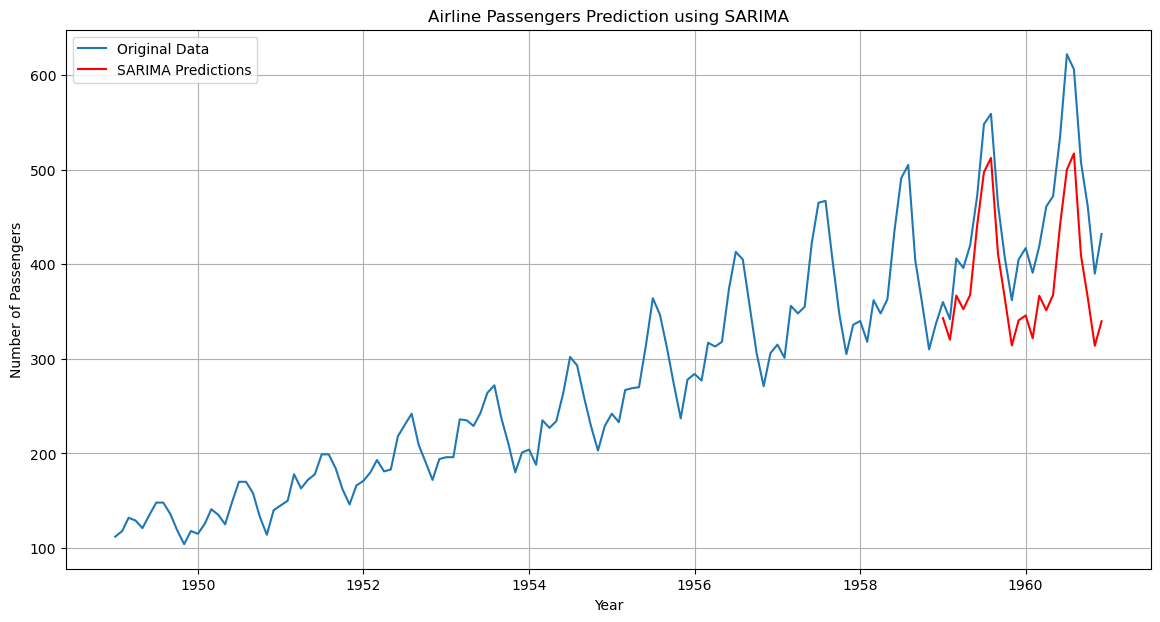


--- 预测未来24个月的客流量 ---


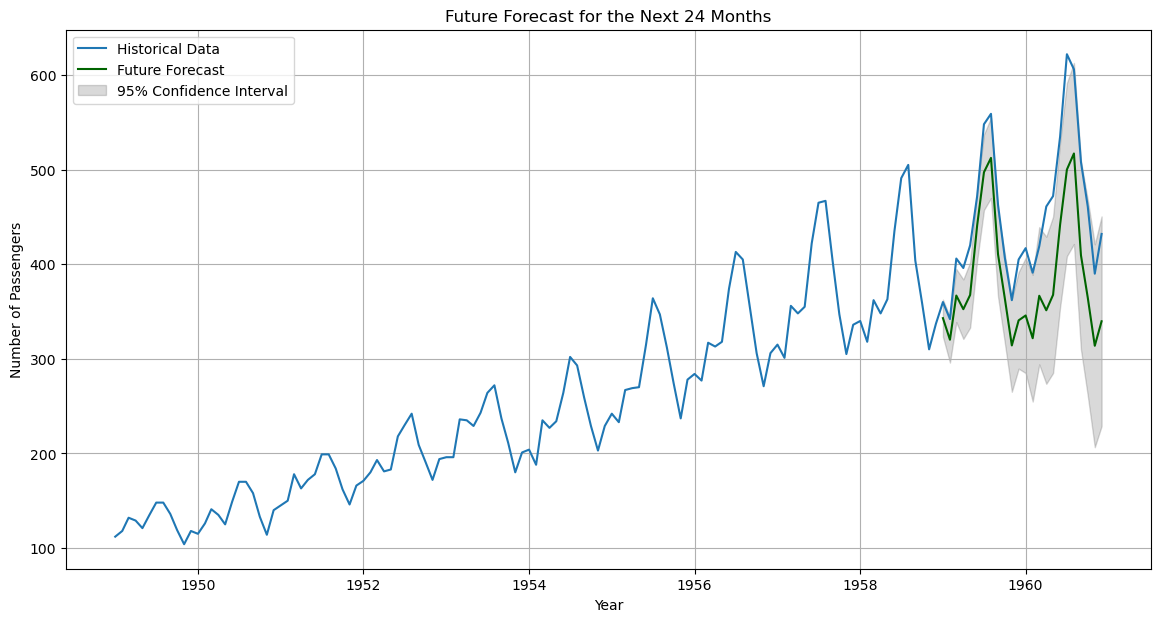

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# --- 1. 数据加载与探索 ---
# 加载经典航空乘客数据集
# 数据源：https://www.kaggle.com/datasets/rakannimer/air-passengers
# 为了方便，我们直接从一个URL读取
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
df.columns = ['Passengers']

# 可视化原始数据
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'])
plt.title('Monthly International Airline Passengers (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# --- 2. 时间序列分解 ---
# 将时间序列分解为趋势、季节性和残差
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

# --- 3. 平稳性检验与差分 ---
# ADF检验来判断平稳性
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("数据是平稳的")
    else:
        print("数据是非平稳的")

print("--- 原始数据的平稳性检验 ---")
adf_test(df['Passengers'])

# 对数据进行差分以使其平稳
# 一阶差分消除趋势
df_diff = df['Passengers'].diff().dropna()
# 季节性差分消除季节性 (周期为12)
df_diff_seasonal = df_diff.diff(12).dropna()

print("\n--- 经过趋势和季节性差分后的数据平稳性检验 ---")
adf_test(df_diff_seasonal)

# 可视化差分后的数据
plt.figure(figsize=(12, 6))
plt.plot(df_diff_seasonal)
plt.title('Data after First and Seasonal Differencing')
plt.grid(True)
plt.show()
# 结论: d=1, D=1

# --- 4. 使用 auto_arima 自动寻找最优参数 ---
# auto_arima 会自动测试不同的p, q, P, Q组合，并基于AIC准则选择最优模型
# m=12 表示季节周期为12个月
print("\n--- 使用 auto_arima 寻找最优SARIMA参数 ---")
auto_model = auto_arima(df['Passengers'],
                        start_p=1, start_q=1,
                        test='adf',
                        max_p=3, max_q=3,
                        m=12,
                        start_P=0, seasonal=True,
                        d=1, D=1,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

print(auto_model.summary())
# auto_arima 可能会推荐类似 SARIMAX(2, 1, 1)x(0, 1, 1, 12) 的模型

# --- 5. 建立并训练最终的SARIMA模型 ---
# 划分训练集和测试集
train_data = df['Passengers'][:'1958-12']
test_data = df['Passengers']['1959-01':]

# 使用auto_arima找到的参数建立模型
# 如果auto_arima的结果不稳定，也可以手动指定一个常见的模型
# order=(p,d,q), seasonal_order=(P,D,Q,m)
model = SARIMAX(train_data,
                order=auto_model.order,
                seasonal_order=auto_model.seasonal_order)

print("\n--- 训练最终的SARIMA模型 ---")
results = model.fit()
print("模型训练完成!")

# --- 6. 进行预测并评估 ---
# 预测未来，步数等于测试集的长度
predictions = results.get_prediction(start=test_data.index[0], end=test_data.index[-1], dynamic=False)
predictions_mean = predictions.predicted_mean

# 计算均方根误差
rmse = np.sqrt(mean_squared_error(test_data, predictions_mean))
print(f"\n模型的均方根误差 (RMSE): {rmse:.2f}")

# --- 7. 可视化预测结果 ---
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'], label='Original Data')
plt.plot(predictions_mean, color='red', label='SARIMA Predictions')
plt.title('Airline Passengers Prediction using SARIMA')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

# 预测未来两年
print("\n--- 预测未来24个月的客流量 ---")
future_forecast = results.get_forecast(steps=24)
future_mean = future_forecast.predicted_mean
future_ci = future_forecast.conf_int()

plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'], label='Historical Data')
plt.plot(future_mean, color='darkgreen', label='Future Forecast')
plt.fill_between(future_ci.index,
                 future_ci.iloc[:, 0],
                 future_ci.iloc[:, 1], color='k', alpha=.15, label='95% Confidence Interval')
plt.title('Future Forecast for the Next 24 Months')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

三、 结果解读与分析

初步探索：

第一张图清晰地展示了数据的上升趋势和年度周期性。
第二张分解图将这两个成分完美地分离了出来，让我们对数据结构有了更深刻的认识。

平稳化处理：
ADF检验的p值远大于0.05，证实了原始数据的非平稳性。
经过一次常规差分（d=1）和一次季节性差分（D=1，周期m=12）后，ADF检验的p值变得非常小，数据变得平稳，可以用于建模。

自动参数选择：
auto_arima的输出会展示它尝试不同参数组合的过程，并最终给出一个AIC (Akaike Information Criterion) 值最低的模型。AIC是一个类似于BIC的模型选择准则，值越小越好。这避免了我们手动分析ACF/PACF图的繁琐过程。

预测结果可视化：

第一张预测图（红色线）展示了模型对测试集（1959-1960年）的预测。你会看到，模型的预测曲线几乎完美地捕捉到了真实数据的趋势和季节性波动，证明了模型的强大拟合与预测能力。
第二张预测图（绿色线）展示了模型对未知未来（1961-1962年）的预测。模型自信地延续了历史的增长趋势和季节模式，并且还给出了一个置信区间（灰色区域），表示预测的不确定性会随着时间的推移而增大。

结论：

这个经典的例子完美地展示了SARIMA模型如何系统性地解决一个复杂的时间序列问题。它通过分解、差分、参数寻优、建模、预测这一套标准流程，成功地从数据自身的历史中提取出了趋势和季节性这两种核心规律，并据此做出了高度准确的预测。这使得SARIMA及其变体至今仍是金融、零售、气象等领域进行时间序列预测的基石模型之一。